# Universidade Federal do Ceará - Campus Quixadá-CE
## Trabalho Final Aprendizado de Máquina
### Tema: 2.4 GHZ Indoor Channel Measurements Data Set
#### Link: https://archive.ics.uci.edu/ml/datasets/2.4+GHZ+Indoor+Channel+Measurements
---
### Informações do Aluno: 
#### Nome: *João Mateus Dias do Carmo*
##### Matrícula: *390187*
#### Semestre: *7º*
#### Curso: *Engenharia de Computação*
#### Email: joaomateus102030@gmail.com
#### GitHub: https://github.com/JoaoMateus1010

## Descrição do trabalho
O trabalho tem como objetivo a análise de sinais de transmissão entre um receptor e um emisor de forma a classificar a comunicação entre os dispositivos em uma certa faixa de transmissão definida pelo IEEE 802.11 (Wi-Fi) nas faixas dos canais 1,6 e 11.

A medição do domínio de frequência do parâmetro de espalhamento, S21, do canal sem fio foi realizada utilizando o analisador de rede vetorial ZVB14 (VNA) de Rhode e Schwartz. O sistema de medição consiste no VNA, cabos RF de baixa perda e antenas omnidirecionais nas extremidades do transmissor e receptor.

**Nomeclatura usada no trabalho:**
>* Tx- Transmissor
>* Rx- Receptor
>* f- Frequência
>* t- Tempo
>* BW- Largura de Banda
>* FCH- Frequência de corte alta
>* FCL- Frequência de corte baixa

**Lugares das medições e suas classificações de esclarecimento dos dados:**
>* Lab139 - altamente confuso
>* Corredor_rm155 - meio confuso (Há muitas paredes)
>* Main_Lobby - Baixa confusão
>* Sports_Hall - Baixa confusão (Espaço aberto)

**Informações do ambiente de medição**
>* Tx e Rx estão a 1.5 metros de altura verticalmente.
>* Foram feitas 10 varreduras consecutivas
>* Cada varredura contém 601 pontos de amostra de frequência
>* O espaçamento entre as amostras é f=0,167 MHz, equivalente a (t=5,9µs)
>* É definido BW=100MHz centralizada em f=2.4GHz
>* Resolução é definida como t=10ns

**Objetivo**

É esperado que o algoritimo seja capaz de classificar em qual faixa de frequência o está atuando na comunicação.
Definindo os canais como:
>* Canal 1: 1 Mbit/s ~ 0.12 MB/s
>* Canal 6: 6 Mbit/s ~ 0.66 MB/s
>* Canal 11: 11 Mbit/s ~ 1.31 MB/s

## Importações necessárias

In [ ]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import itertools as tools
from sklearn.preprocessing import StandardScaler,scale,Normalizer
#Classificadores
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.svm import LinearSVC,NuSVC,SVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Definições dos nomes

### Criação dos Datasets para cada leitura

In [ ]:
Datasets = dict()
Datasets["Corridor_rm155_7.1"] = pd.read_csv("drive/My Drive/Colab Notebooks/Corridor_rm155_7.1.csv")
Datasets["Lab139_7.1"] = pd.read_csv("drive/My Drive/Colab Notebooks/Lab139_7.1.csv")
Datasets["Main_Lobby_7.1"] = pd.read_csv("drive/My Drive/Colab Notebooks/Main_Lobby_7.1.csv")
Datasets["Sport_Hall_7.1"] = pd.read_csv("drive/My Drive/Colab Notebooks/Sport_Hall_7.1.csv")

In [ ]:
Datasets["Corridor_rm155_7.1"] = Datasets["Corridor_rm155_7.1"].drop("Unnamed: 0",axis=1)
Datasets["Lab139_7.1"] =  Datasets["Lab139_7.1"].drop("Unnamed: 0",axis=1)
Datasets["Main_Lobby_7.1"] =  Datasets["Main_Lobby_7.1"].drop("Unnamed: 0",axis=1)
Datasets["Sport_Hall_7.1"] =  Datasets["Sport_Hall_7.1"].drop("Unnamed: 0",axis=1)

In [ ]:
for (key,value) in Datasets.items():
    Datasets[key].columns = Datasets[key].columns.str.replace('Unnamed: 5','Label')
    Datasets[key]["label_read_1"] = np.nan
    Datasets[key]["label_read_2"] = np.nan

## Visualização Inicial dos Dados

In [ ]:
for key in Datasets:
    DatasetAtual = Datasets[key]
    print("----> Dataset: "+str(key)+"\n")
    print(DatasetAtual.head())
    print("\n")
    print(DatasetAtual.info())
    print("\n")
    print(DatasetAtual.describe())
    print("\n")

----> Dataset: Corridor_rm155_7.1

       freq[Hz]  re:Trc1_S11  im:Trc1_S11  ...  Label  label_read_1  label_read_2
0  2.400000e+09     0.150847     0.112573  ...    NaN           NaN           NaN
1  2.400167e+09     0.150640     0.110470  ...    NaN           NaN           NaN
2  2.400333e+09     0.151034     0.108374  ...    NaN           NaN           NaN
3  2.400500e+09     0.151127     0.105698  ...    NaN           NaN           NaN
4  2.400667e+09     0.151428     0.103363  ...    NaN           NaN           NaN

[5 rows x 8 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177960 entries, 0 to 1177959
Data columns (total 8 columns):
freq[Hz]        1177960 non-null float64
re:Trc1_S11     1177960 non-null float64
im:Trc1_S11     1177960 non-null float64
re:Trc2_S21     1177960 non-null float64
im:Trc2_S21     1177960 non-null float64
Label           0 non-null float64
label_read_1    0 non-null float64
label_read_2    0 non-null float64
dtypes: float64(8)
memory u

### Visualização Gráfica

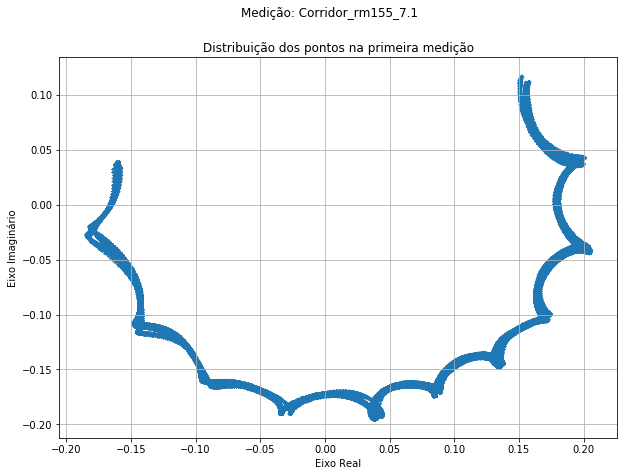

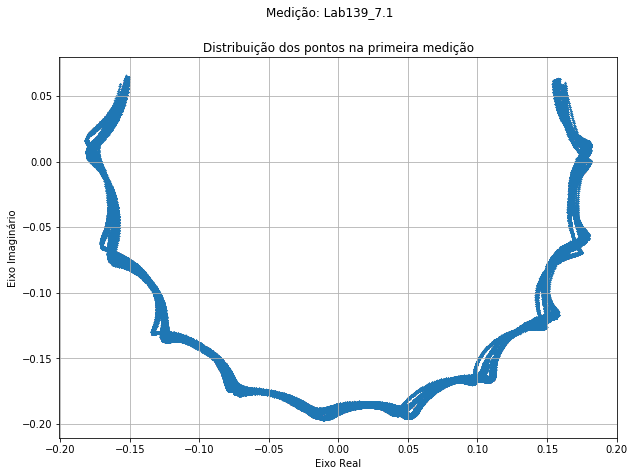

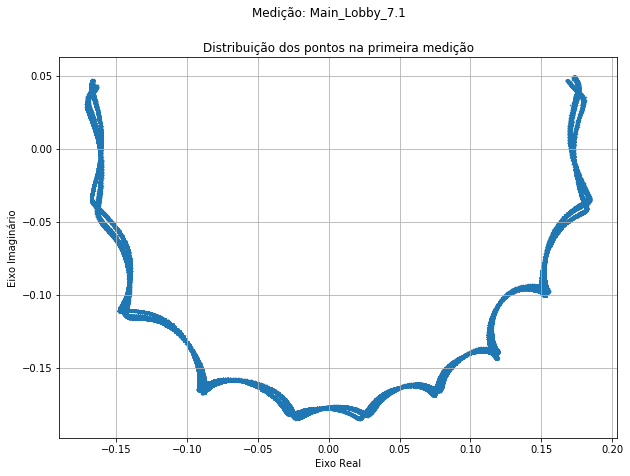

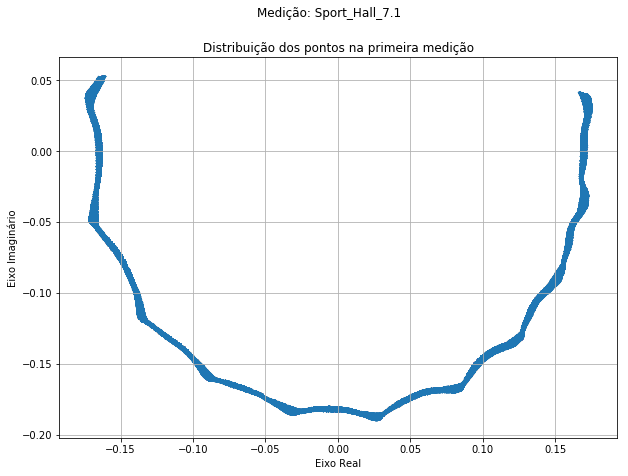

In [ ]:
array_x = None
array_y = None
for (key,value) in Datasets.items():    
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc1_S11"].values
    array_y = Datasets[key]["im:Trc1_S11"].values  
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1)

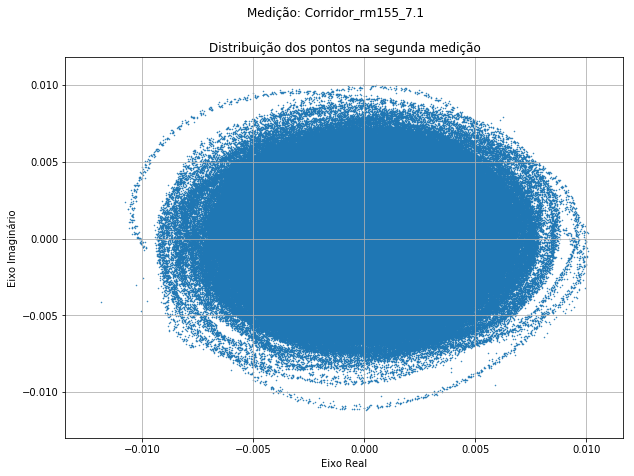

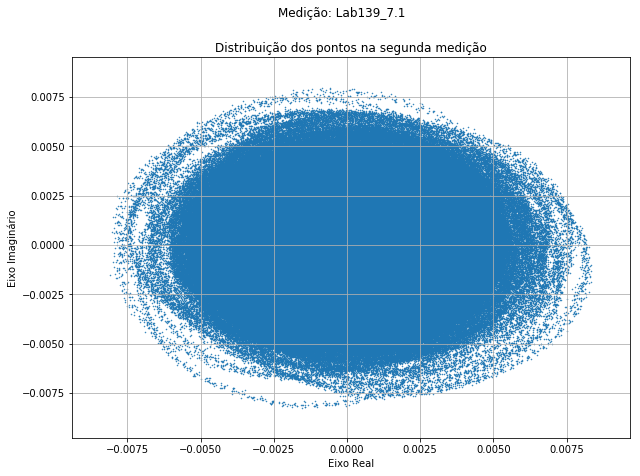

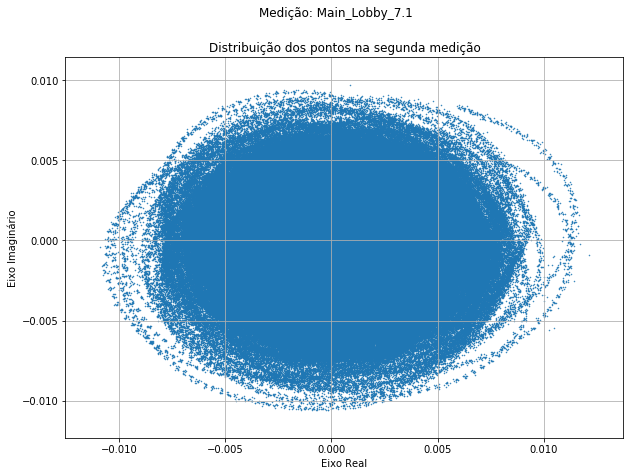

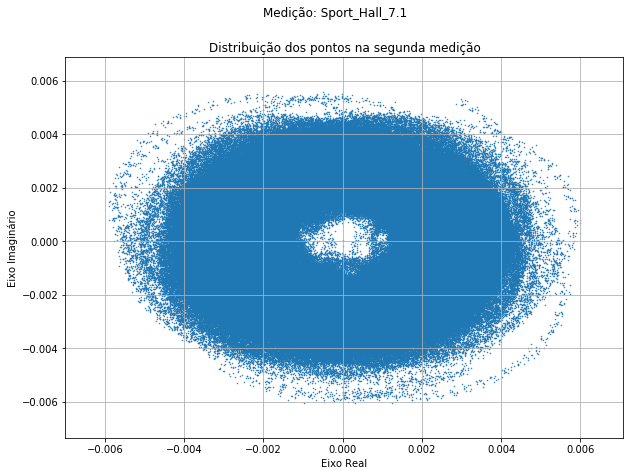

In [ ]:
array_x = None
array_y = None
for (key,value) in Datasets.items():    
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"].values
    array_y = Datasets[key]["im:Trc2_S21"].values  
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1)

## Clustering dos dados para realizar o agrupamento

In [ ]:
ModelCluster = KMeans(n_clusters=3,n_jobs=-1)
dataframe_x_y = pd.DataFrame()
for (key,value) in Datasets.items():
    #Primeira leitura
    dataframe_x_y["x"] = Datasets[key]["re:Trc1_S11"].values
    dataframe_x_y["y"] = Datasets[key]["im:Trc1_S11"].values
    result_fit = ModelCluster.fit(dataframe_x_y.values)
    Datasets[key]["label_read_1"] = result_fit.labels_
    #Segunda leitura
    dataframe_x_y["x"] = Datasets[key]["re:Trc2_S21"].values
    dataframe_x_y["y"] = Datasets[key]["im:Trc2_S21"].values
    result_fit = ModelCluster.fit(dataframe_x_y.values)
    Datasets[key]["label_read_2"] = result_fit.labels_

## Resultados obtidos da clustering feita usando o KMeans

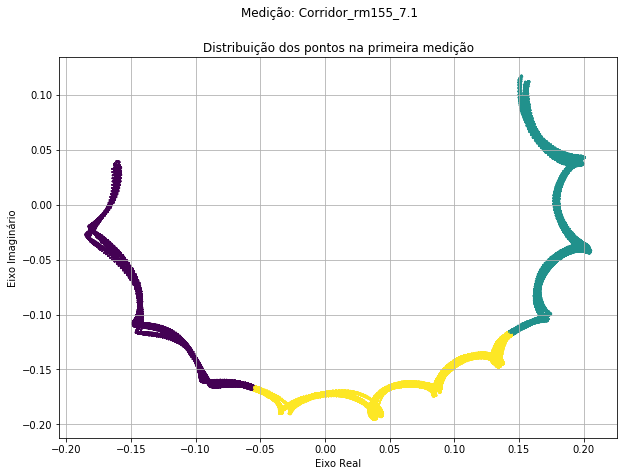

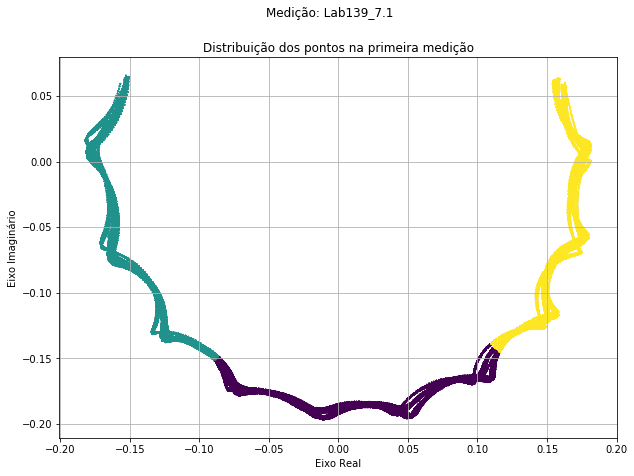

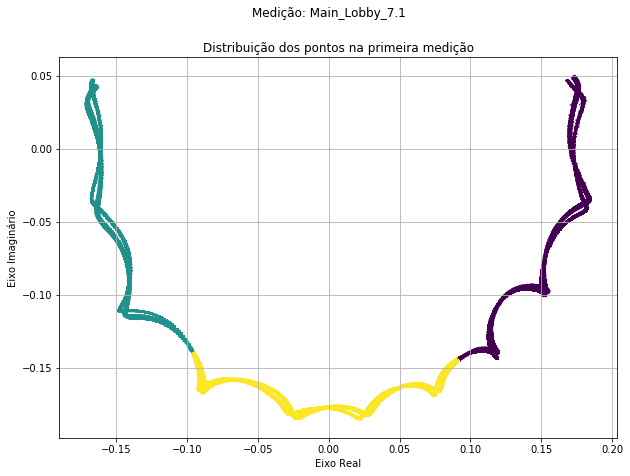

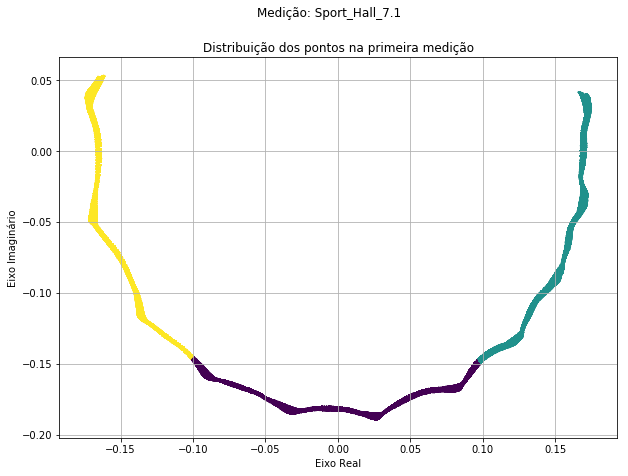

In [ ]:
for (key,value) in Datasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc1_S11"]
    array_y = Datasets[key]["im:Trc1_S11"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["label_read_1"].values)

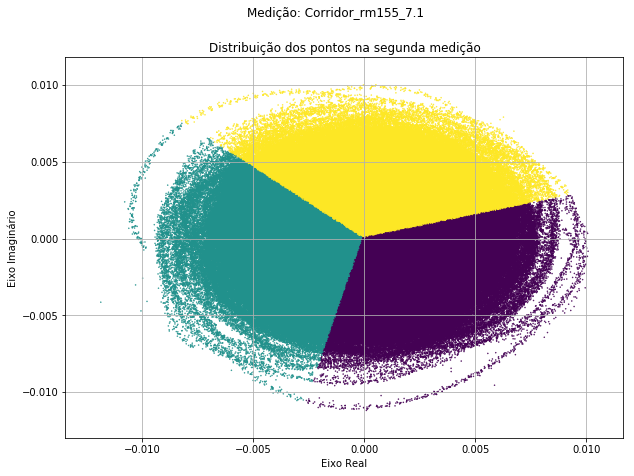

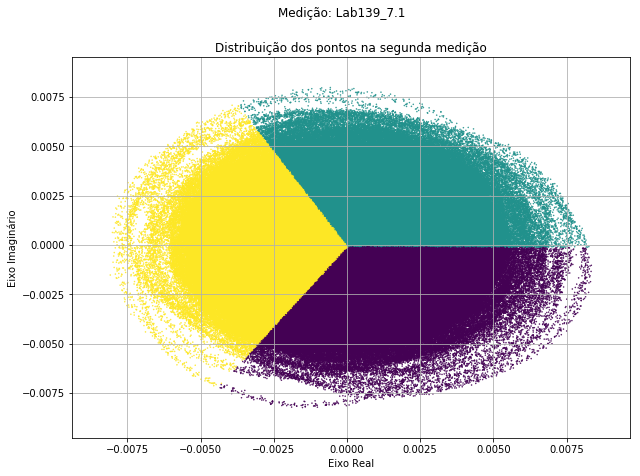

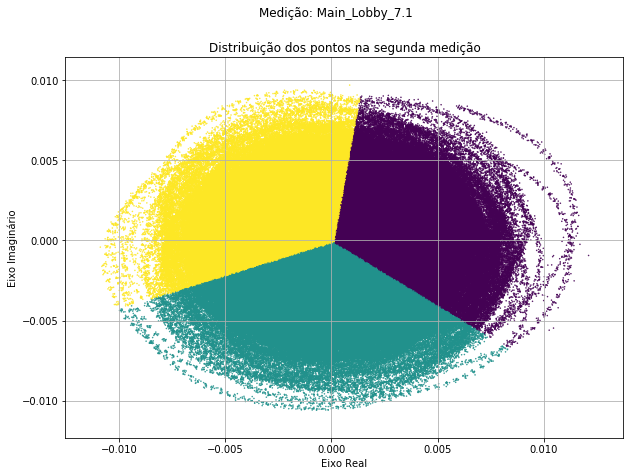

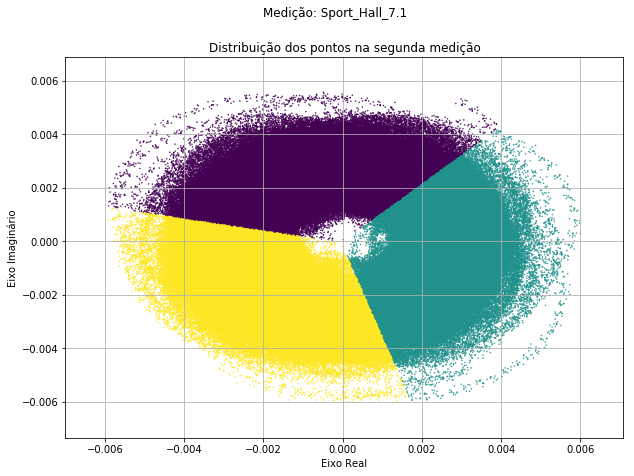

In [ ]:
for (key,value) in Datasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"]
    array_y = Datasets[key]["im:Trc2_S21"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["label_read_2"].values)

### Junção dos resultos obtidos da leitura do primeiro sensor e do segundo sensor

In [ ]:
NewDatasets = dict()
NewDatasets = Datasets
for (key,value) in NewDatasets.items():        
    mask = NewDatasets[key]["label_read_1"].values == NewDatasets[key]["label_read_2"].values
    print(key,"->",str(np.sum(mask)))
    NewDatasets[key]["Label"]=np.where(mask,NewDatasets[key]["label_read_1"],NewDatasets[key]["Label"])    

Corridor_rm155_7.1 -> 390244
Lab139_7.1 -> 383916
Main_Lobby_7.1 -> 407471
Sport_Hall_7.1 -> 412269


### Visualização dos valores das Labels filtradas

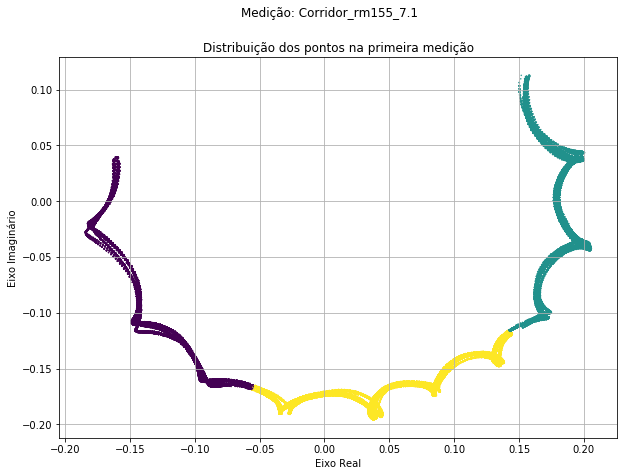

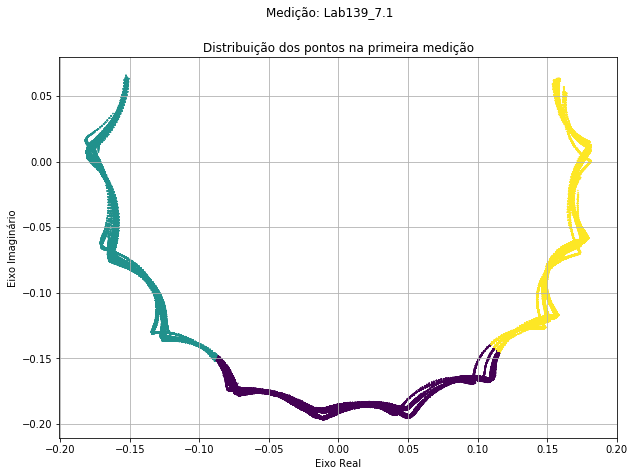

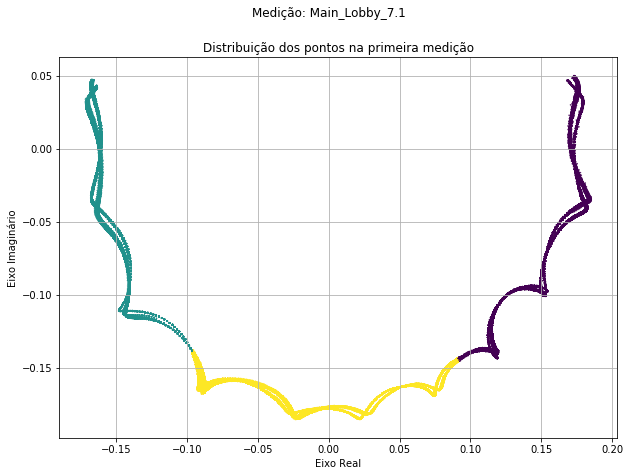

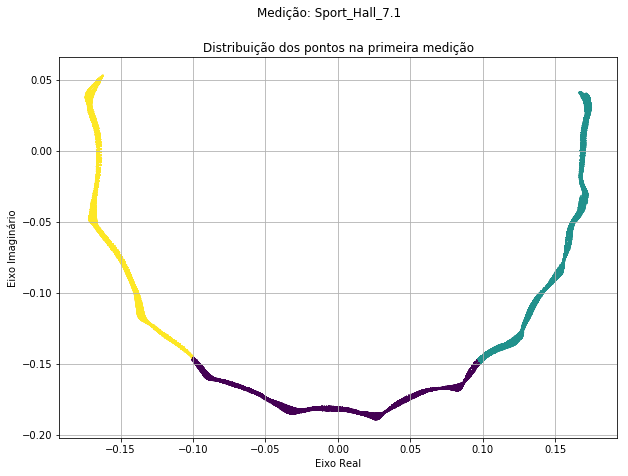

In [ ]:
for (key,value) in NewDatasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = NewDatasets[key]["re:Trc1_S11"]
    array_y = NewDatasets[key]["im:Trc1_S11"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=NewDatasets[key]["Label"].values)

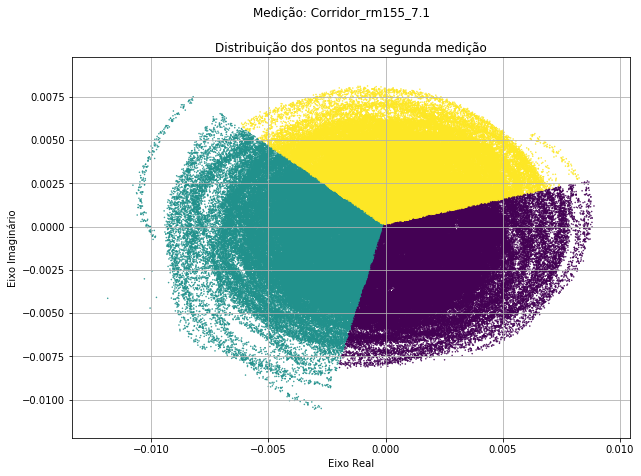

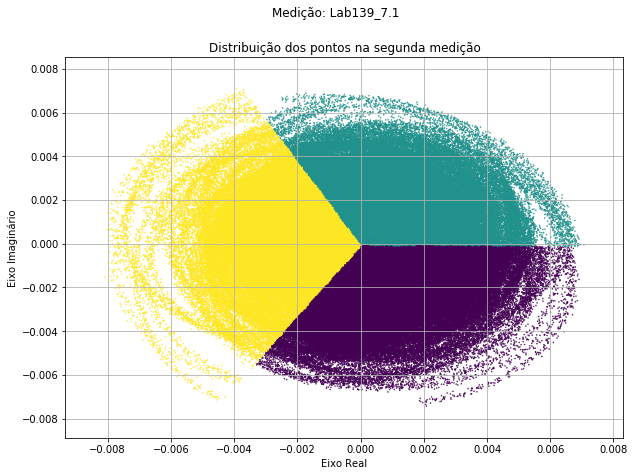

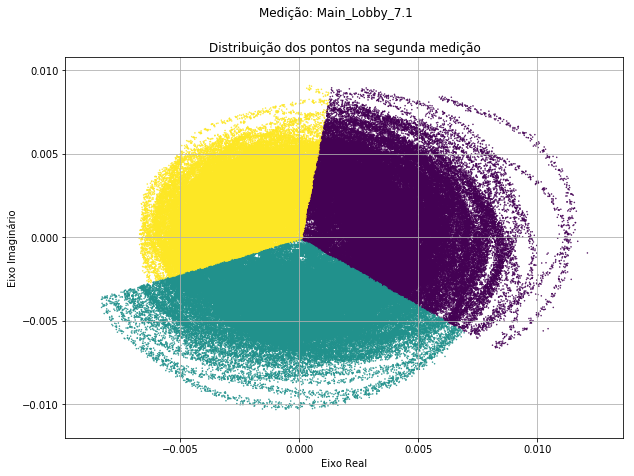

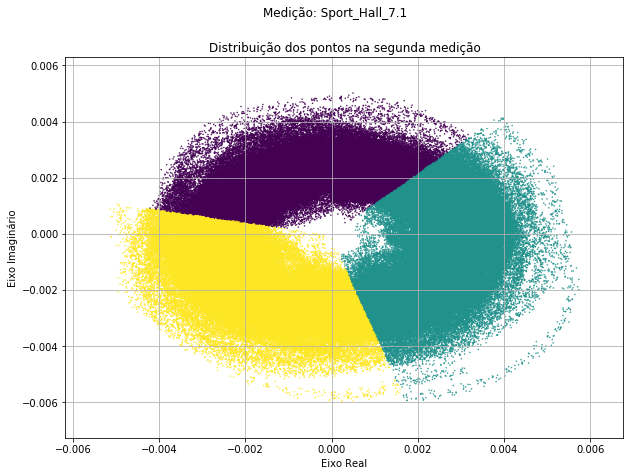

In [ ]:
for (key,value) in NewDatasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"]
    array_y = Datasets[key]["im:Trc2_S21"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["Label"].values)

## Tratar valores faltantes

Contagem:
Local:  Corridor_rm155_7.1  Quantidade:  787716
Local:  Lab139_7.1  Quantidade:  794044
Local:  Main_Lobby_7.1  Quantidade:  770489
Local:  Sport_Hall_7.1  Quantidade:  765691


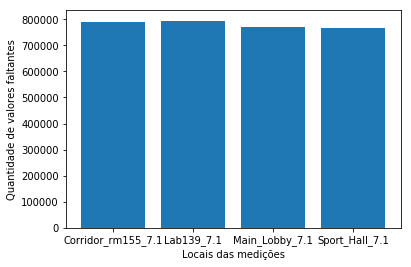

In [ ]:
listKeyMiss = list()
lisVallMiss = list()
print("Contagem:")
for (key,values) in NewDatasets.items():    
    listKeyMiss.append(key)
    lisVallMiss.append(np.isnan(values["Label"]).sum())  
    print("Local: ",key," Quantidade: ",np.isnan(values["Label"]).sum())
plt.ylabel("Quantidade de valores faltantes")
plt.xlabel("Locais das medições")
plt.bar(np.asarray(listKeyMiss),np.asarray(lisVallMiss));

In [ ]:
for (key,values) in NewDatasets.items():    
    NewDatasets[key]["Label"]=np.where(np.isnan(values["Label"].values),values["Label"].mode(),values["Label"].values)
    #print(values["Label"].mode())

Contagem:
Local:  Corridor_rm155_7.1  Quantidade:  0
Local:  Lab139_7.1  Quantidade:  0
Local:  Main_Lobby_7.1  Quantidade:  0
Local:  Sport_Hall_7.1  Quantidade:  0


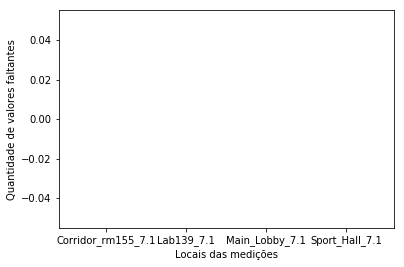

In [ ]:
listKeyMiss = list()
lisVallMiss = list()
print("Contagem:")
for (key,values) in NewDatasets.items():    
    listKeyMiss.append(key)
    lisVallMiss.append(np.isnan(values["Label"]).sum())  
    print("Local: ",key," Quantidade: ",np.isnan(values["Label"]).sum())
plt.ylabel("Quantidade de valores faltantes")
plt.xlabel("Locais das medições")
plt.bar(np.asarray(listKeyMiss),np.asarray(lisVallMiss));

### Ultimos tratamentos antes de treinar os modelos de classificação

#### Retirar duas colunas de Label das leituras 1 e 2, deixando apenas a Label

In [ ]:
for (key,values) in NewDatasets.items():
    NewDatasets[key] = NewDatasets[key].drop(["label_read_1","label_read_2"],axis=1)

## Início do treino dos modelos

In [ ]:
list_algo = dict()
NewModels = dict()
names_models = ["BernoulliNB","GaussianNB","DecisionTreeClassifier","ExtraTreeClassifier","AdaBoostClassifier","BaggingClassifier","RandomForestClassifier","KNeighborsClassifier"]

#### Criação da Lista de Algoritmos que serão usados

In [ ]:
list_algo[names_models[0]]=BernoulliNB()
list_algo[names_models[1]]=GaussianNB()
list_algo[names_models[2]]=DecisionTreeClassifier()
list_algo[names_models[3]]=ExtraTreeClassifier()
list_algo[names_models[4]]=AdaBoostClassifier() 
list_algo[names_models[5]]=BaggingClassifier()
list_algo[names_models[6]]=RandomForestClassifier() 
list_algo[names_models[7]]=KNeighborsClassifier()

In [ ]:
for (names,values) in NewDatasets.items():
    NewModels[names] = dict()

In [ ]:
tempdict = dict()
for (name,value) in NewModels.items():
    tempdict = NewModels[name]
    for (key_mod,value_mod) in list_algo.items():
        tempdict[key_mod]=value_mod
    NewModels[name] = tempdict

### Separação de valores de treino e teste

#### Separando 80% para treino e 20% para test

In [ ]:
NewTuplesTrainTest = dict()
for (names,values) in NewDatasets.items():
    [x_train,x_test,y_train,y_test] = train_test_split(NewDatasets[names].values[:,:-1],NewDatasets[names].values[0:,-1],test_size=0.2,random_state=42)
    NewTuplesTrainTest[names] = [x_train,x_test,y_train,y_test]

In [ ]:
(np.shape(NewTuplesTrainTest[names][0]),np.shape(NewTuplesTrainTest[names][1]),np.shape(NewTuplesTrainTest[names][2]),np.shape(NewTuplesTrainTest[names][3]))

((942368, 5), (235592, 5), (942368,), (235592,))

### Estandardização dos valores de treino

In [ ]:
SdtSca = StandardScaler()
for (key,values) in NewTuplesTrainTest.items():
    x_train_temp = SdtSca.fit_transform(NewTuplesTrainTest[key][0])    
    NewTuplesTrainTest[key][0] = x_train_temp   

## Treino dos Modelos

In [ ]:
NewAccDict = dict()

In [ ]:
for (key,value) in NewModels.items():
    tempmodel = dict()
    for (key2,value2) in NewModels[key].items():
        tempmodel[key2] = np.float(0.0)
    NewAccDict[key] = tempmodel

In [ ]:
for (key,value) in NewModels.items():
    acc_atual = np.float(0.0)
    print("Iniciou Local -> ",key)
    for (key2,value2) in NewModels[key].items():
        print("    Iniciou Model -> ",key2)
        mod = value2
        val = mod.fit(NewTuplesTrainTest[key][0],NewTuplesTrainTest[key][2])
        NewAccDict[key][key2]=val.score(NewTuplesTrainTest[key][1],NewTuplesTrainTest[key][3])
        print("    Terminou Model -> ",key2)
    print("Termonou Local -> ",key)

## Analisando Graficamente Acurácias dos Modelos

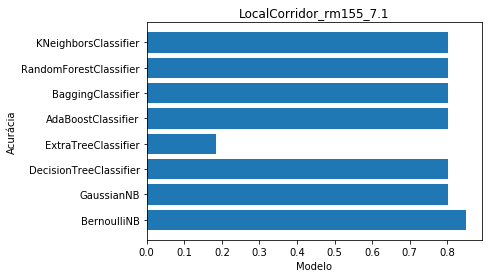

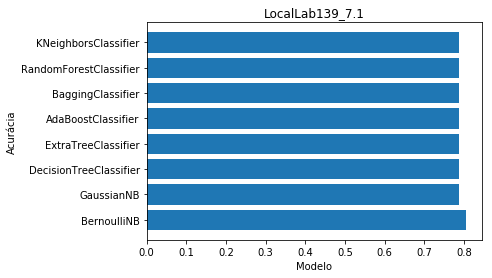

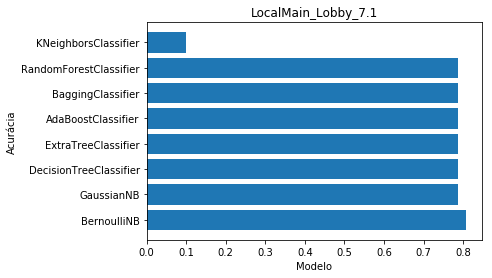

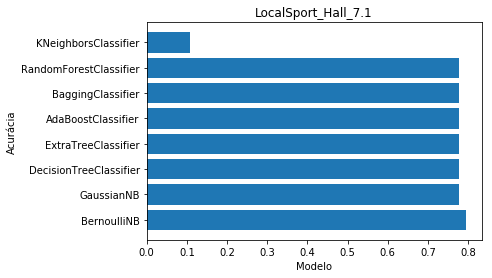

In [ ]:
for (key,value) in NewAccDict.items():
  acc_current = list()
  
  for (key2,value2) in NewAccDict[key].items():
    acc_current.append(value2)
  plt.xlabel("Modelo")
  plt.ylabel("Acurácia")
  plt.title("Local"+str(key))
  plt.barh(np.asarray(names_models),np.asarray(acc_current))
  plt.show()

### Visualizando o melhor e o pior resultado

In [ ]:
DFAcc = pd.DataFrame(NewAccDict)
DFAcc

,Corridor_rm155_7.1,Lab139_7.1,Main_Lobby_7.1,Sport_Hall_7.1
AdaBoostClassifier,0.801492,0.787128,0.785986,0.777051
BaggingClassifier,0.801492,0.787128,0.785986,0.777051
BernoulliNB,0.848475,0.803847,0.806330,0.793631
DecisionTreeClassifier,0.800689,0.787128,0.785986,0.777051
ExtraTreeClassifier,0.184654,0.787128,0.785986,0.777051
GaussianNB,0.801492,0.787128,0.785986,0.777051
KNeighborsClassifier,0.801492,0.787128,0.099524,0.107576
RandomForestClassifier,0.801492,0.787128,0.785986,0.777051


#### Melhor e pior algoritmo para Corridor_rm155_7.1

Melhor Modelo :  BernoulliNB , com a acurácia =  0.8484753302319263
Pior Modelo :  ExtraTreeClassifier , com a acurácia =  0.18465397806377126


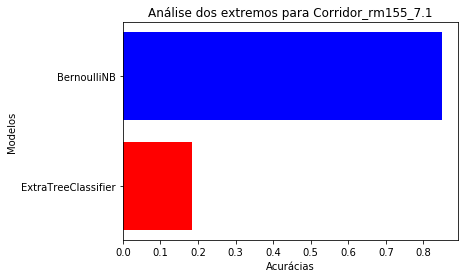

In [ ]:
bestAcc = np.max(DFAcc["Corridor_rm155_7.1"])
bestModel = DFAcc.index[DFAcc["Corridor_rm155_7.1"].values == np.max(DFAcc["Corridor_rm155_7.1"])].values[0]
worstAcc = np.min(DFAcc["Corridor_rm155_7.1"])
worstModel = DFAcc.index[DFAcc["Corridor_rm155_7.1"].values == np.min(DFAcc["Corridor_rm155_7.1"])].values[0]
plt.ylabel("Modelos")
plt.xlabel("Acurácias")
plt.title("Análise dos extremos para Corridor_rm155_7.1")
plt.barh([worstModel,bestModel],[worstAcc,bestAcc],color=["red","blue"])
print("Melhor Modelo : ",bestModel,", com a acurácia = ",bestAcc)
print("Pior Modelo : ",worstModel,", com a acurácia = ",worstAcc)

#### Melhor e pior algoritmo para Lab139_7.1

Melhor Modelo :  BernoulliNB , com a acurácia =  0.8038473292811301
Pior Modelo :  AdaBoostClassifier , com a acurácia =  0.7871277462732181


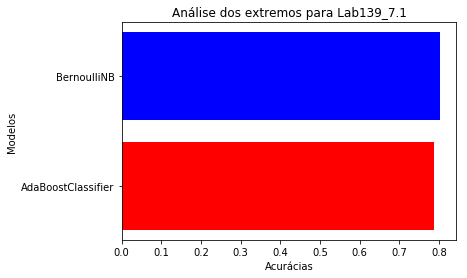

In [ ]:
bestAcc = np.max(DFAcc["Lab139_7.1"])
bestModel = DFAcc.index[DFAcc["Lab139_7.1"].values == np.max(DFAcc["Lab139_7.1"])].values[0]
worstAcc = np.min(DFAcc["Lab139_7.1"])
worstModel = DFAcc.index[DFAcc["Lab139_7.1"].values == np.min(DFAcc["Lab139_7.1"])].values[0]
plt.ylabel("Modelos")
plt.xlabel("Acurácias")
plt.title("Análise dos extremos para Lab139_7.1")
plt.barh([worstModel,bestModel],[worstAcc,bestAcc],color=["red","blue"])
print("Melhor Modelo : ",bestModel,", com a acurácia = ",bestAcc)
print("Pior Modelo : ",worstModel,", com a acurácia = ",worstAcc)

#### Melhor e pior algoritmo para Main_Lobby_7.1

Melhor Modelo :  BernoulliNB , com a acurácia =  0.8063304356684438
Pior Modelo :  KNeighborsClassifier , com a acurácia =  0.09952375292879215


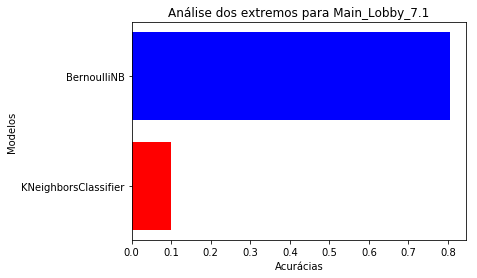

In [ ]:
bestAcc = np.max(DFAcc["Main_Lobby_7.1"])
bestModel = DFAcc.index[DFAcc["Main_Lobby_7.1"].values == np.max(DFAcc["Main_Lobby_7.1"])].values[0]
worstAcc = np.min(DFAcc["Main_Lobby_7.1"])
worstModel = DFAcc.index[DFAcc["Main_Lobby_7.1"].values == np.min(DFAcc["Main_Lobby_7.1"])].values[0]
plt.ylabel("Modelos")
plt.xlabel("Acurácias")
plt.title("Análise dos extremos para Main_Lobby_7.1")
plt.barh([worstModel,bestModel],[worstAcc,bestAcc],color=["red","blue"])
print("Melhor Modelo : ",bestModel,", com a acurácia = ",bestAcc)
print("Pior Modelo : ",worstModel,", com a acurácia = ",worstAcc)

#### Melhor e pior algoritmo para Sport_Hall_7.1

Melhor Modelo :  BernoulliNB , com a acurácia =  0.7936305137695677
Pior Modelo :  KNeighborsClassifier , com a acurácia =  0.10757580902577336


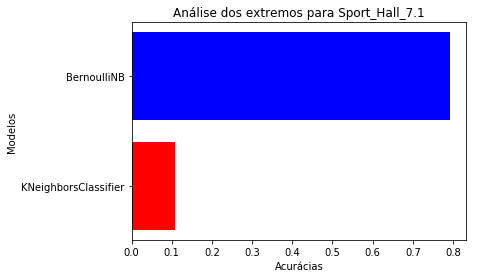

In [ ]:
bestAcc = np.max(DFAcc["Sport_Hall_7.1"])
bestModel = DFAcc.index[DFAcc["Sport_Hall_7.1"].values == np.max(DFAcc["Sport_Hall_7.1"])].values[0]
worstAcc = np.min(DFAcc["Sport_Hall_7.1"])
worstModel = DFAcc.index[DFAcc["Sport_Hall_7.1"].values == np.min(DFAcc["Sport_Hall_7.1"])].values[0]
plt.ylabel("Modelos")
plt.xlabel("Acurácias")
plt.title("Análise dos extremos para Sport_Hall_7.1")
plt.barh([worstModel,bestModel],[worstAcc,bestAcc],color=["red","blue"])
print("Melhor Modelo : ",bestModel,", com a acurácia = ",bestAcc)
print("Pior Modelo : ",worstModel,", com a acurácia = ",worstAcc)